##  该文本论述了几种图像处理方案，用于检测图像中矩形块，主要用到了边沿提取，图像形状分割与识别
方案1，这个是模拟一个图像，然后从图像中提取轮廓并绘图
假如是真的待检测的打印台与烟盒呢？，识别的应该是烟盒的轮廓，烟盒上各个区域块的轮廓
TODO ：需要继续写代码，将烟盒图输入并验证

In [10]:
# TODO  该代码块主要是载入图像所在路径，并读入图像
import aircv as ac
import cv2
# pos = ac.find_template(imsrc,imobj)
# image = cv2.pyrMeanShiftFiltering(image, 25, 10)
bg = '/Users/zhoudaoxian/Documents/bg_table.jpg'
bg = ac.imread(bg)
# bg =  cv2.cvtColor(bg,cv2.COLOR_BGR2GRAY)
box = '/Users/zhoudaoxian/Documents/bg.png'
box = ac.imread(box)
# box =  cv2.cvtColor(box,cv2.COLOR_BGR2GRAY)
obj = '/Users/zhoudaoxian/Documents/target.png'
obj = ac.imread(obj)
# obj =  cv2.cvtColor(obj,cv2.COLOR_BGR2GRAY)

pos_box = ac.find_template(bg,box)
pos_box['rectangle']
obj_pos =  ac.find_template(box,obj)
obj_pos['rectangle']

((286, 233), (286, 332), (376, 233), (376, 332))

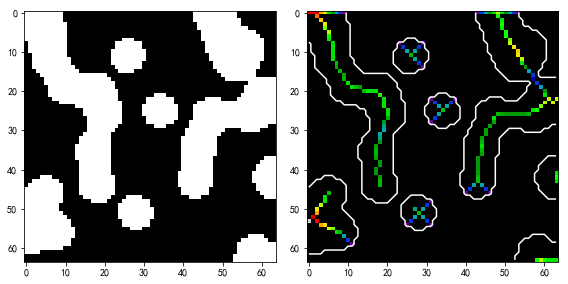

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]], dtype=bool)

In [6]:
import numpy as np
import scipy.ndimage as ndi
from skimage import morphology
import matplotlib.pyplot as plt

#编写一个函数，生成测试图像
def microstructure(l=256):
    n = 5
    x, y = np.ogrid[0:l, 0:l]
    mask = np.zeros((l, l))
    generator = np.random.RandomState(1)  # 指定随机数种子
    points = l * generator.rand(3, n**2)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndi.gaussian_filter(mask, sigma=l/(4.*n))
    return mask > mask.mean()

data = microstructure(l=64) #生成测试图像

#计算中轴和距离变换值
skel, distance =morphology.medial_axis(data, return_distance=True)

#中轴上的点到背景像素点的距离
dist_on_skel = distance * skel

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
#用光谱色显示中轴
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(data, [0.5], colors='w')  #显示轮廓线

fig.tight_layout()
plt.show()
data

In [3]:
data.shape

(64, 64)

/Users/zhoudaoxian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


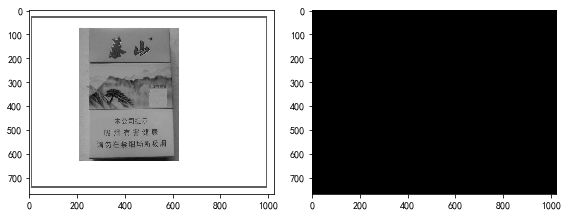

In [11]:
bg =  cv2.cvtColor(bg,cv2.COLOR_BGR2GRAY)
data = bg

#计算中轴和距离变换值
skel, distance =morphology.medial_axis(data, return_distance=True)

#中轴上的点到背景像素点的距离
dist_on_skel = distance * skel

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
#用光谱色显示中轴
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(data, [0.5], colors='w')  #显示轮廓线

fig.tight_layout()
plt.show()

## 主要是矩形识别
方案二

1) 图像预处理 一般而言即使做普通的边缘检测也需要提前对图像进行降噪避免误测，比如最常见的办法是先对图像进行高斯滤波，然而这样也会导致图像变得模糊，当待检测图形边缘不明显，或是图像本身分辨率不高的情况下(比如本文用的例子)，会在降噪的同时把待检测的边缘强度也给牺牲了。具体到本文的例子，纸张是白色，背景是浅黄带纹路，如果进行高斯滤波是显然不行的，这时候一个替代方案是可以考虑使用Mean Shift，Mean Shift的优点就在于如果是像背景桌面的浅色纹理，图像分割的过程中相当于将这些小的浮动过滤掉，并且保留相对明显的纸张边缘

image = cv2.pyrMeanShiftFiltering(image, 25, 10)

### 定义一个再图像上画出,x,y 位置的标记点的函数


In [3]:

def draw_circle(img, pos, circle_radius, color, line_width):
    cv2.circle(img, pos, circle_radius, color, line_width)
#     cv2.imshow('objDetect', bg) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show_circle(img, pos, circle_radius, color, line_width):
    cv2.circle(img, pos, circle_radius, color, line_width)
    cv2.imshow('objDetect', img) 
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### 标记传送带上的烟盒 根据（）截图查找法（） 不是这个名字，这是我通俗的叫法。官方定义叫：find_template¶

In [5]:

circle_center_pos = pos_box['result']
circle_center_pos = (int(circle_center_pos[0]),int(circle_center_pos[1]))
circle_radius = 50
color = (0, 255, 0)
line_width = 10
# draw circle
show_circle(bg, circle_center_pos, circle_radius, color, line_width)

### 标记烟盒上的打印区，根据（）截图查找法（）  不是这个名字，这是我通俗的叫法。官方定义叫：find_template

In [ ]:
obj_center_pos = obj_pos['resu
color = (0, 255, 0)
line_width = 10
# draw circle
show_circle(bg, circle_center_pos, circle_radius, color, line_width)lt']
obj_center_pos = (int(obj_center_pos[0]),int(obj_center_pos[1]))
circle_radius = 50

show_circle(box, circle_center_pos, circle_radius, color, line_width)

2) 纸张边缘检测

虽然降噪了，可是图像里还是有很多边缘明显的元素。怎么尽量只保留纸张的边缘呢，这时候可以考虑用分割算法，把图像分为纸张部分和其他部分，这样分割的mask边缘就和纸张边缘应该是差不多重合的。在这里可以考虑用GrabCut，这样对于简单的情况，比如纸张或画布和背景对比强烈的，直接把图像边缘的像素作为bounding box就可以实现自动分割。当自动分割不精确的情况下再引入手动辅助分割，具体到我这里用的例子，背景和画面接近，所以需要手动辅助

In [ ]:
import argparse
import imutils
import cv2
 

box = '/Users/zhoudaoxian/Documents/bg.png' 
# box = '/Users/zhoudaoxian/Documents/allshape.jpg' 
# load the image, convert it to grayscale, blur it slightly,
# and threshold it
# image = cv2.imread(args["image"])
image = cv2.imread(box)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# img = cv2.imread("2.jpg", 0)  #Canny只能处理灰度图，所以将读取的图像转成灰度图  
    
# image = cv2.GaussianBlur(image,(3,3),0) #高斯平滑处理原图像降噪   
image = cv2.Canny(image, 50, 150)     #apertureSize默认为3  

# image = cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient ]]])   
blurred = cv2.GaussianBlur(image, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# find contours in the thresholded image

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image
	cv2.imshow("Image", image)
	cv2.waitKey(0)
